# Sleep Health and Lifestyle Prediction

## Introduction

Dataset: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

The chosen dataset compiles data for *sleep health and lifestyle* evidence.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

### Data Cleansing: missing values and outliers

##### Null values

In [3]:
# Null values
data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

##### Null deletion

In [4]:
data['Sleep Disorder'] = data['Sleep Disorder'].replace(np.nan, 'None')

In [5]:
# Descriptive stats
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


All columns and rows contain important values, so no column or row should be eliminated. Also, none of the variables present exaggerated values (e.g. the minimum and maximum age found do not exceed the common age range, the same for the number of minutes of physical exercise, blood pressure or heart rate, so eliminating rows or modifying them should not be essential).

In [6]:
# Detect outliers

def detect_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

columns_to_check = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                    'Stress Level', 'Heart Rate', 'Daily Steps']
outliers_list = []
for col in columns_to_check:
    outliers = detect_outliers_iqr(data, col)
    outliers_list.append(outliers)

# Concatenate all outliers into a single dataframe
outliers_df = pd.concat(outliers_list)

# Delete outliers from original dataset
# data = data.drop(outliers_df.index)

# Count of outliers
print("Amount of found outliers:", len(outliers_df))

Amount of found outliers: 15


Although the dataset contains outliers, the variables contain unique features to each individual. This can be considered valuable for encompassing common and rare data in sleep disorders. Outliers can permit demonstration of extremities in a mental disorder or disturbance context. In the descriptive statistics, noted above, there appear to be no unrealistic values.

In [7]:
# Replace every 'Normal Weight' row with 'Normal'
data['BMI Category'] = data['BMI Category'].replace(to_replace='Normal Weight', value='Normal')

Since the dataset in its BMI Category variable presents two different values for the same category ('Normal' and 'Normal Weight'), one should be replaced by the other.

### Univariate Analysis

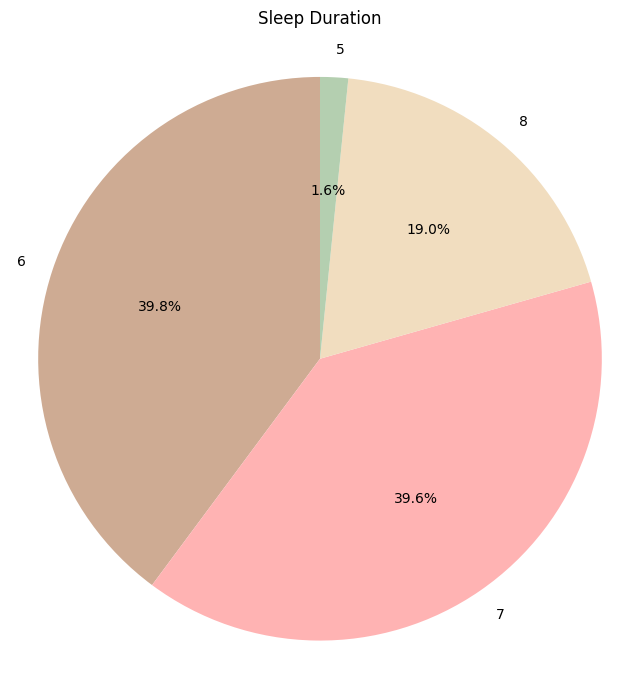

In [8]:
# Sleep Duration pie graph

labels = data['Sleep Duration'].astype(int).value_counts().index
counts = data['Sleep Duration'].astype(int).value_counts().values

plt.figure(figsize=(8, 8.5))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#CEAB93', '#FFB3B3', '#F1DDBF', '#B4CFB0'])
plt.axis('equal')
plt.title('Sleep Duration')
plt.show()

According to this dataset, six and seven hours are the most frequent amount of sleep, separated by a slight difference of 0.2%. The recommended amount of sleep for the majority of the population is eight hours, so the percentages show that most people do not get the right amount of sleep.

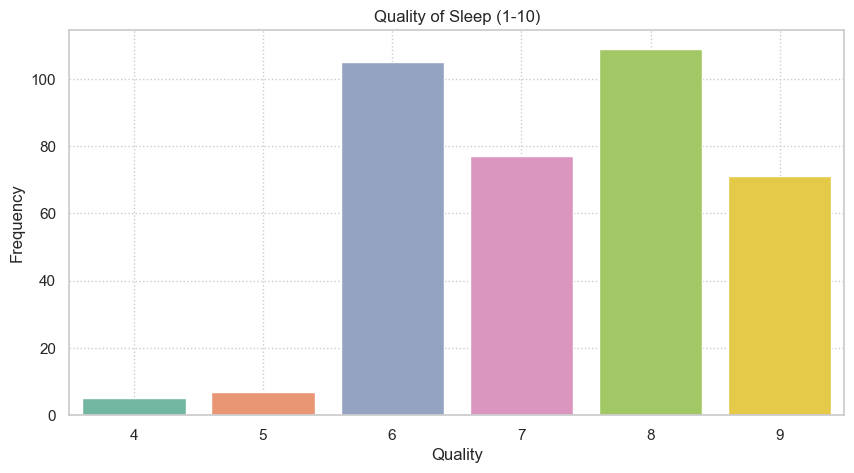

In [19]:
# Quality of Sleep barplot

plt.figure(figsize=(10, 5))
sns.countplot(x='Quality of Sleep', data=data, palette='Set2', hue='Quality of Sleep', legend=False)
plt.title('Quality of Sleep (1-10)')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.grid(linestyle=':')
plt.show()

Rating of eight for sleep quality hold the highest frequency, followed by six with a slight difference. No one rated their sleep quality as ten or less than four.

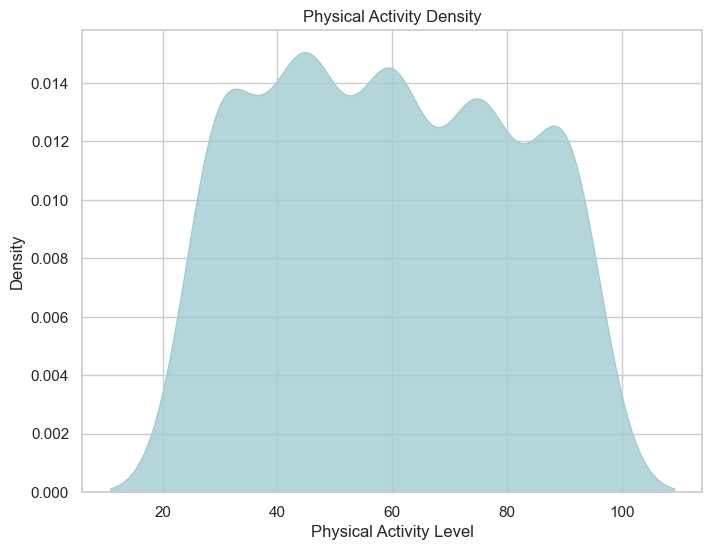

In [15]:
# Physical Activity Level density

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.kdeplot(data['Physical Activity Level'], fill=True, color='#A1CCD1', alpha=0.8)
plt.xlabel('Physical Activity Level')
plt.ylabel('Density')
plt.title('Physical Activity Density')
plt.show()

This density graph shows the number of minutes of physical activity, with the highest density in the approximate range of 30 min to 60 min total, with some ups and downs.

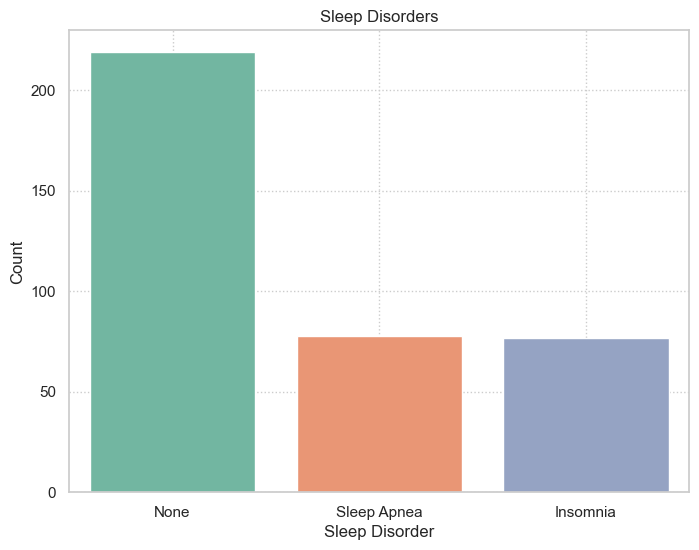

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sleep Disorder', palette='Set2', hue='Sleep Disorder', legend=False)
plt.title('Sleep Disorders')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.grid(linestyle=':')
plt.show()

Bar graph shows the amount of people with sleep disorders. The majority do not present any disorder. Sleep apnea and insomnia seem to have the same frequency.

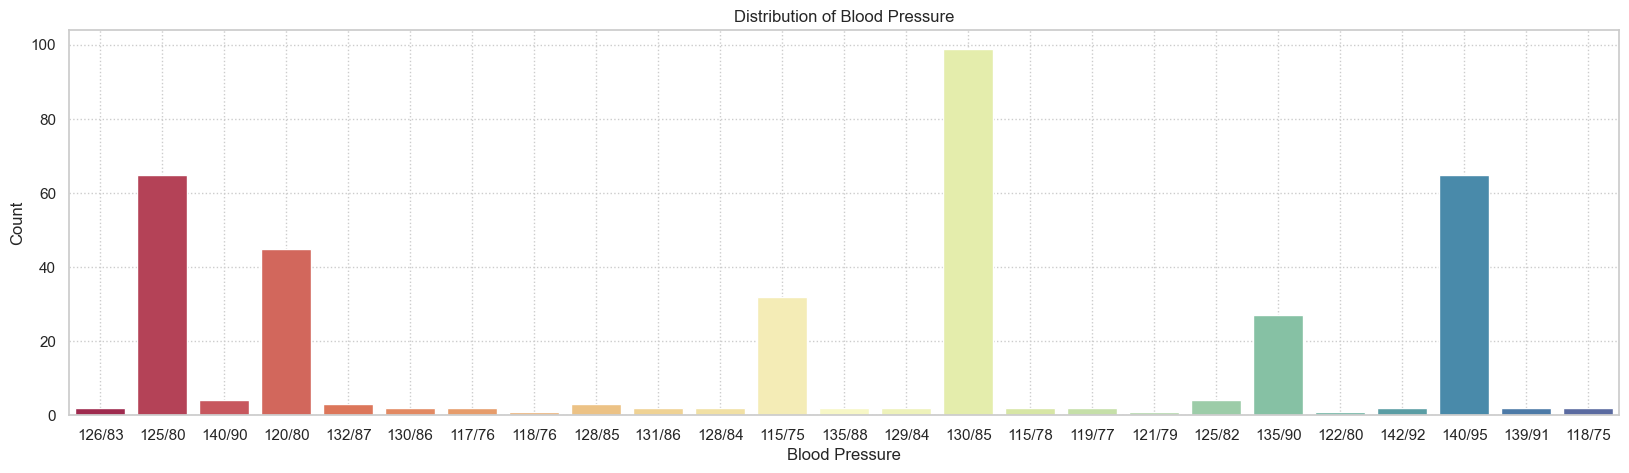

In [18]:
plt.figure(figsize=(20, 5))
sns.countplot(x='Blood Pressure', data=data, hue='Blood Pressure', palette='Spectral')
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.grid(linestyle=':')
plt.show()

Blood pressure of 130/85 presents the highest frequency in the dataset, followed by 140/95 and 125/80. The higher rates in this plot are higher than normal blood pressure levels. Could this mean that blood pressure affects sleep?

### Multivariate analysis

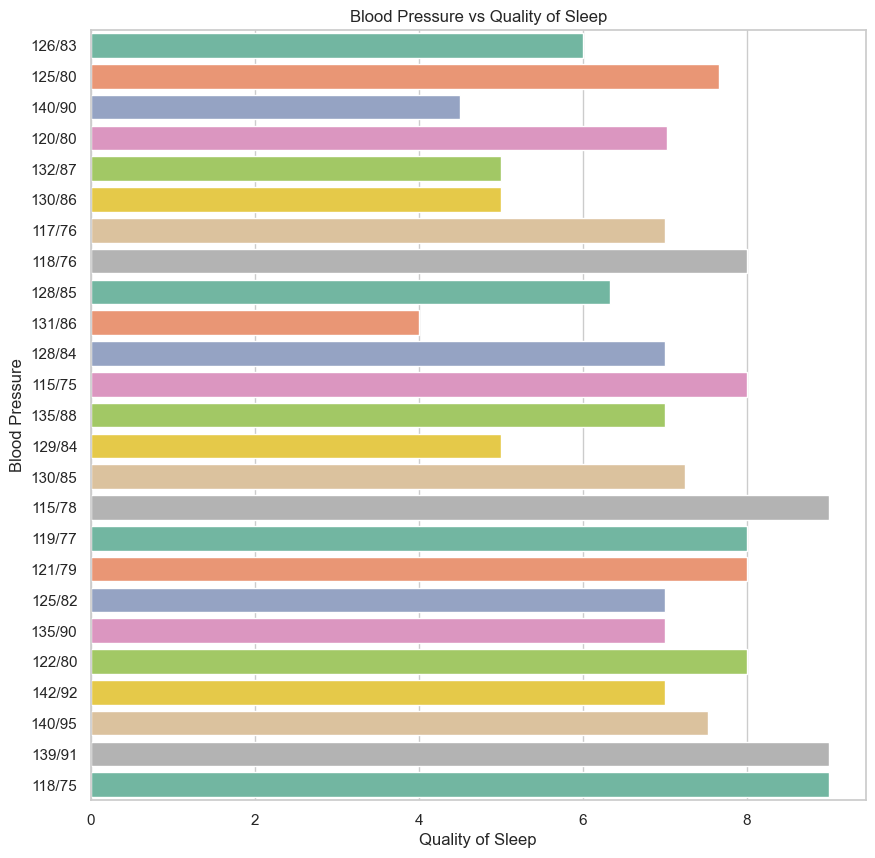

In [25]:
plt.figure(figsize=(10, 10))
sns.barplot(data=data, x='Quality of Sleep', y='Blood Pressure', palette='Set2', hue='Blood Pressure', legend=False, errorbar=None)
plt.xlabel('Quality of Sleep')
plt.ylabel('Blood Pressure')
plt.title('Blood Pressure vs Quality of Sleep')
plt.show()

Indeed, normal blood pressure levels indicate better sleep quality. The level of 130/85 (the most frequent as shown in the previous graph) indicates a sleep quality rating of seven, while higher levels still present a worse sleep quality.

In [8]:
# Correlation between 'Age' and 'Sleep Duration'
corr_age_sleep = data[['Age', 'Sleep Duration']].corr()
print(corr_age_sleep)

                     Age  Sleep Duration
Age             1.000000        0.344709
Sleep Duration  0.344709        1.000000


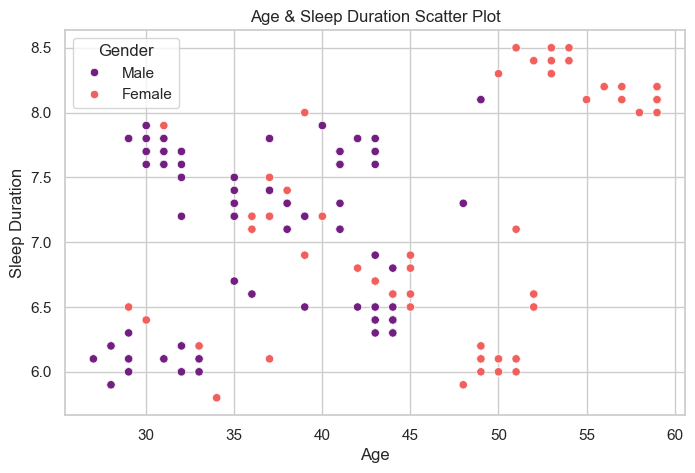

In [27]:
# Age and Sleep Duration scatterplot

plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Age', y='Sleep Duration', hue='Gender', palette='magma')
plt.title('Age & Sleep Duration Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.legend(title='Gender')
plt.show()

Dispersion of sleep duration values by age, separated by gender. Women older than 50 years have the longer sleep duration, the opposite of men; men younger than 50 years have the shorter sleep duration.

In [28]:
# Correlation between 'Heart Rate' and 'Daily Steps'
corr_rate_steps = data[['Heart Rate', 'Daily Steps']].corr()
print(corr_rate_steps)

             Heart Rate  Daily Steps
Heart Rate     1.000000    -0.030309
Daily Steps   -0.030309     1.000000


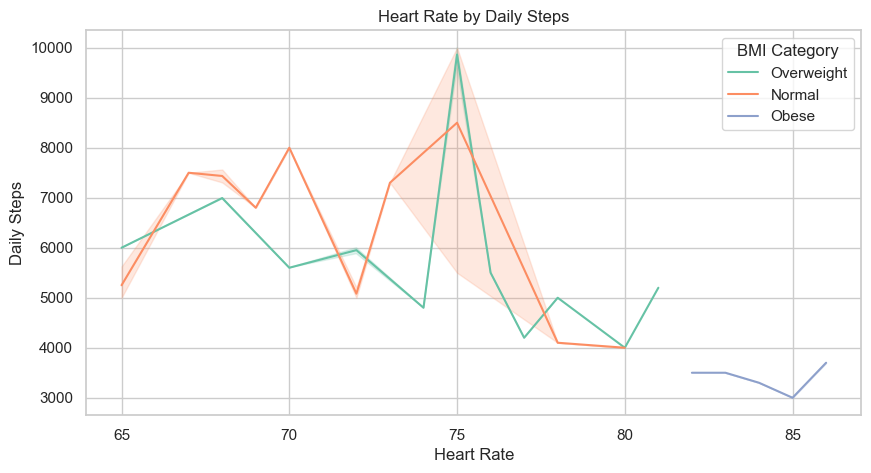

In [30]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='Heart Rate', y='Daily Steps', hue='BMI Category', palette='Set2')
plt.title('Heart Rate by Daily Steps')
plt.xlabel('Heart Rate')
plt.ylabel('Daily Steps')
plt.legend(title='BMI Category')
plt.show()

Line plot showing the relationship between daily steps and resting heart rate, BMI category. People who walk approx. 10,000 steps per day suggest a heart rate of 75, in the overweight category. Those who walk slightly less suggest a heart rate of less than 75. However, those with a heart rate greater than 75 are those who walk less, especially those who are obese.

In [31]:
# Correlation between 'Heart Rate' and 'Quality of Sleep'
corr_rate_sleep = data[['Heart Rate', 'Quality of Sleep']].corr()
print(corr_rate_sleep)

                  Heart Rate  Quality of Sleep
Heart Rate          1.000000         -0.659865
Quality of Sleep   -0.659865          1.000000


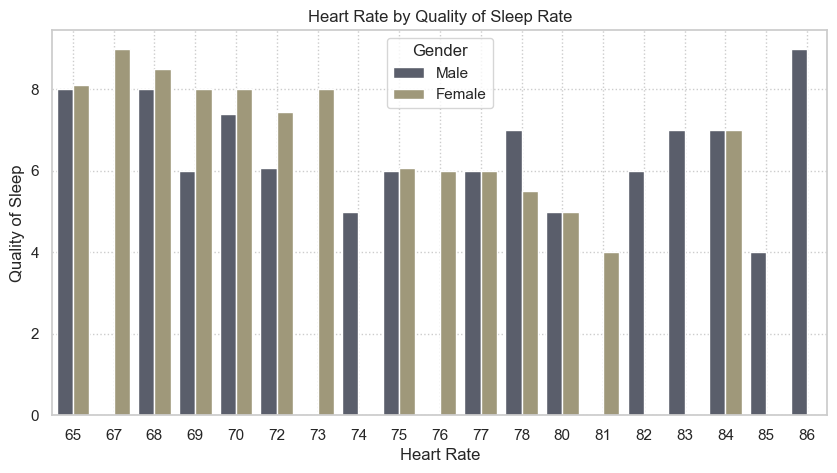

In [32]:
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x='Heart Rate', y='Quality of Sleep', errorbar=None, hue='Gender', palette='cividis')
plt.xlabel('Heart Rate')
plt.ylabel('Quality of Sleep')
plt.title('Heart Rate by Quality of Sleep Rate')
plt.legend(title='Gender')
plt.grid(linestyle=':')
plt.show()

Rates show that lower heart rates have a higher quality of sleep, with the exception of the rate at 86 with a high quality rating. The normal rate ranges from 60 to 100 beats per minute.

In [33]:
# Correlation between 'Sleep Duration' and 'Stress Level'
corr_sleep_stress = data[['Sleep Duration', 'Stress Level']].corr()
print(corr_sleep_stress)

                Sleep Duration  Stress Level
Sleep Duration        1.000000     -0.811023
Stress Level         -0.811023      1.000000


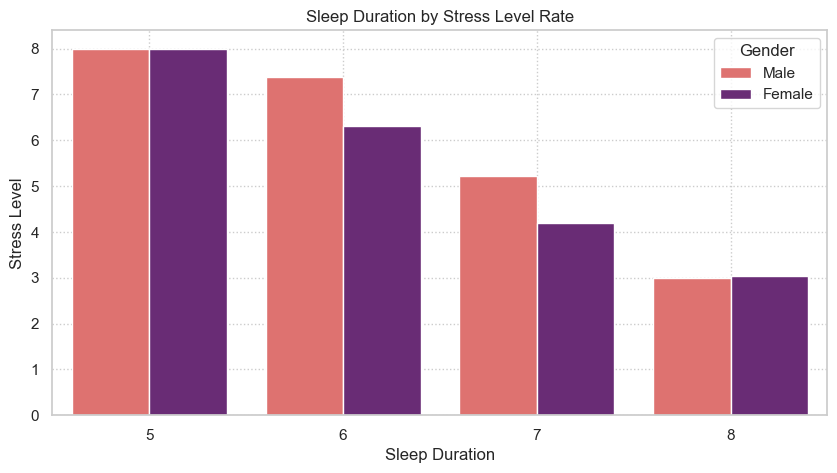

In [34]:
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x=data['Sleep Duration'].astype(int), y='Stress Level', errorbar=None, hue='Gender', palette='magma_r')
plt.xlabel('Sleep Duration')
plt.ylabel('Stress Level')
plt.title('Sleep Duration by Stress Level Rate')
plt.legend(title='Gender')
plt.grid(linestyle=':')
plt.show()

Sleep duration rates by stress level, separated by gender. The correlation is remarkable; the lower the sleep duration, the higher the stress. The level of stress stands out in men.

In [9]:
# Correlation between 'Quality of Sleep' and 'Physical Activity Level'
corr_qua_act = data[['Quality of Sleep', 'Physical Activity Level']].corr()
print(corr_qua_act)

                         Quality of Sleep  Physical Activity Level
Quality of Sleep                 1.000000                 0.192896
Physical Activity Level          0.192896                 1.000000


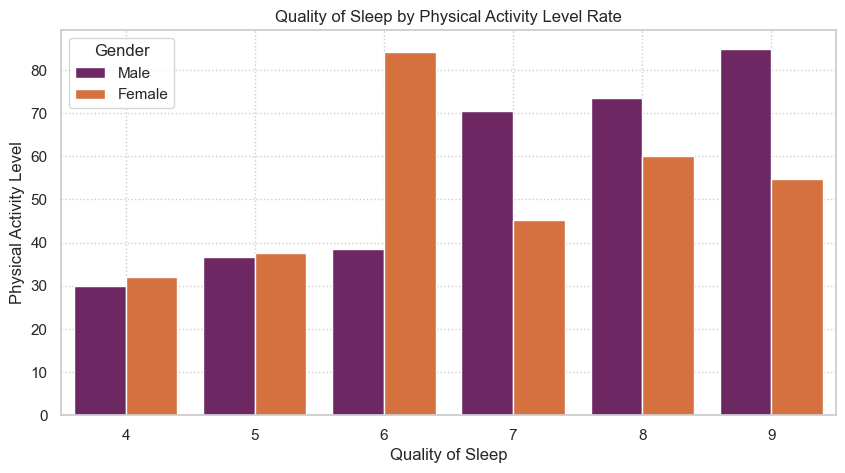

In [36]:
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x='Quality of Sleep', y='Physical Activity Level', errorbar=None, hue='Gender', palette='inferno')
plt.xlabel('Quality of Sleep')
plt.ylabel('Physical Activity Level')
plt.title('Quality of Sleep by Physical Activity Level Rate')
plt.legend(title='Gender')
plt.grid(linestyle=':')
plt.show()

The quality of sleep by subjective value (1-10) separated by gender according to the level of physical activity in minutes. It is shown that the higher the number of minutes of physical activity, the higher the quality of sleep, with the highest rate for both women and men after 80 minutes of physical activity, but with a value of six for women and nine for men.

In [37]:
# Correlation between 'Sleep Duration' and 'Daily Steps'
corr_sleep_steps = data[['Sleep Duration', 'Daily Steps']].corr()
print(corr_sleep_steps)

                Sleep Duration  Daily Steps
Sleep Duration        1.000000    -0.039533
Daily Steps          -0.039533     1.000000


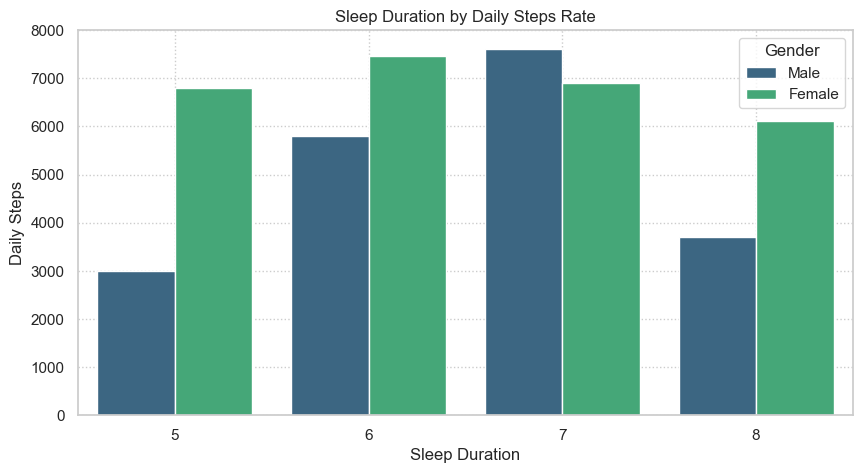

In [38]:
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x=data['Sleep Duration'].astype(int), y='Daily Steps', errorbar=None, hue='Gender', palette='viridis')
plt.xlabel('Sleep Duration')
plt.ylabel('Daily Steps')
plt.title('Sleep Duration by Daily Steps Rate')
plt.legend(title='Gender')
plt.grid(linestyle=':')
plt.show()

Bar plot of sleep duration by daily steps, separated by gender. The highest number of steps caused five, six, seven and eight hours of sleep mainly in women, while in men the rate was not so high except for seven hours with more than 7000 steps.

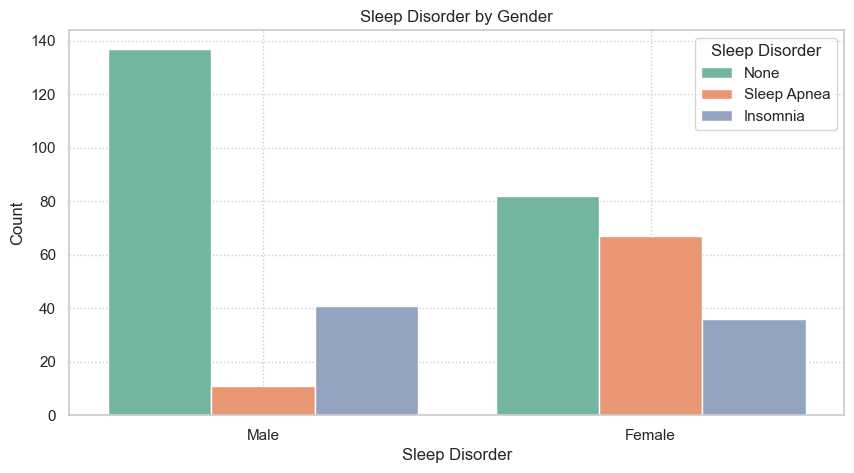

In [39]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Gender', hue='Sleep Disorder', palette='Set2')
plt.title('Sleep Disorder by Gender')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.grid(linestyle=':')
plt.show()

Bar plot to show the number of people with sleep disorders, separated in color by gender. It shows that women have a higher rate of sleep apnea, while men have a higher rate of insomnia, but men also have a very high rate of not suffering from disorders.

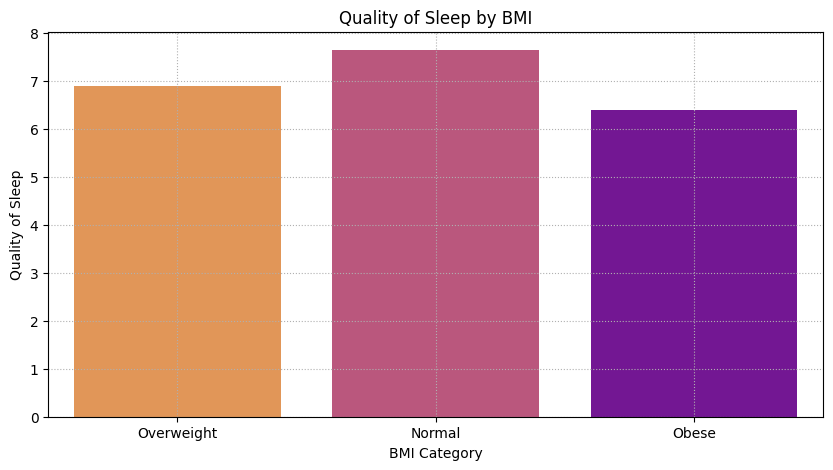

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x='BMI Category', y='Quality of Sleep', errorbar=None, hue='BMI Category', palette='plasma_r')
plt.title('Quality of Sleep by BMI')
plt.xlabel('BMI Category')
plt.ylabel('Quality of Sleep')
plt.grid(linestyle=':')
plt.show()

Sleep quality rates by BMI. A normal BMI indicates higher sleep quality, while the overweight and obese categories have somewhat lower sleep quality than the normal category.

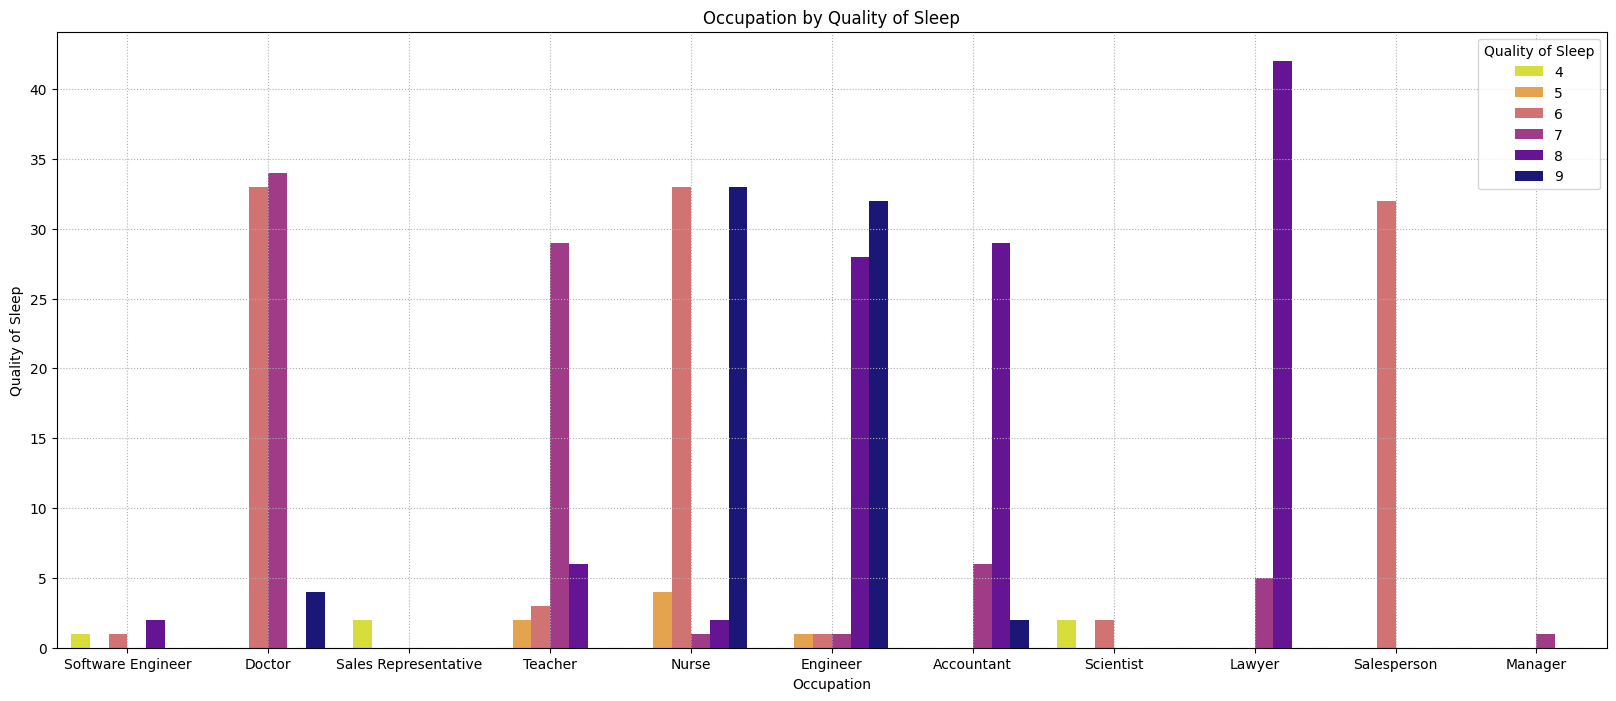

In [11]:
# Correlation bar between Occupation and Quality of Sleep
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x='Occupation', hue='Quality of Sleep', palette='plasma_r')
plt.title('Occupation by Quality of Sleep')
plt.xlabel('Occupation')
plt.ylabel('Quality of Sleep')
plt.grid(linestyle=':')
plt.show()

The occupations of patients with the worst sleep quality are software engineer, sales representative and scientist. Nurses, engineers and lawyers have better sleep quality.

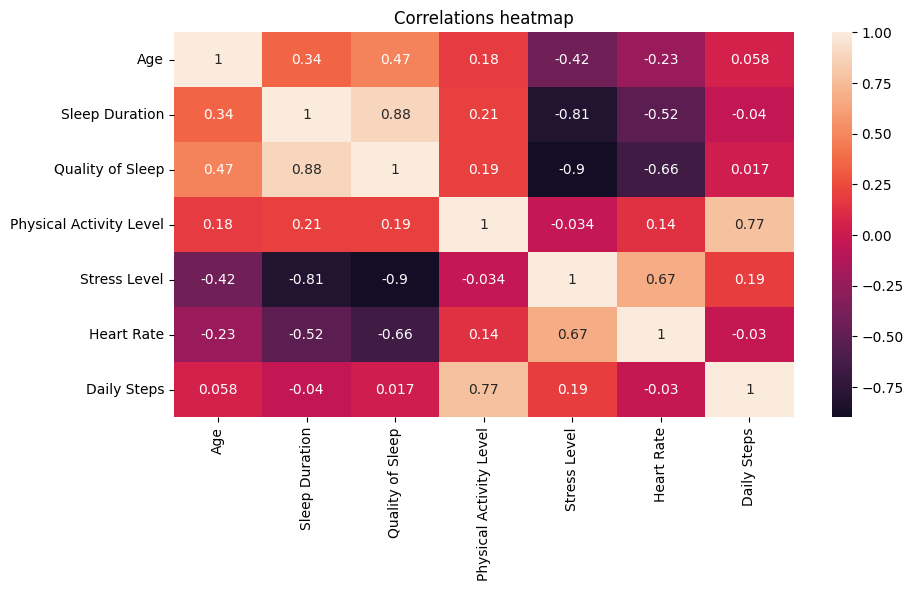

In [13]:
# Correlations heatmap

plt.subplots(figsize=(10, 5))

correlation = data[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                    'Stress Level', 'Heart Rate', 'Daily Steps']].corr()
sns.heatmap(correlation, annot=True, center=0, cmap='rocket')
plt.title('Correlations heatmap')
plt.show()

Heat map of correlations between variables in two dimensions. Correlation is positive when one variable increases while another also increases. Correlation is negative when one variable increases while another decreases.

The strongest positive correlation belongs to the variables <font color='indianred'>Quality of Sleep</font> and <font color='cadetblue'>Sleep Duration</font>. There is a close correlation between the values for the number of hours slept and their quality.

The following strong positive correlation belongs to the variables <font color='palevioletred'>Physical Activity Level</font> and <font color='tomato'>Daily Steps</font>, both on physical activity.
These two appear to have a moderate to low correlation with the variables of stress, sleep quality and sleep duration.

Variables <font color='chocolate'>Heart Rate</font> and <font color='seagreen'>Stress Level</font> also demonstrate a strong positive correlation; when the level of stress increases the resting heart rate also increases.

The strongest negative correlation belongs to the variables <font color='indianred'>Quality of Sleep</font>/<font color='cadetblue'>Sleep Duration</font> and <font color='seagreen'>Stress Level</font>, this is because by increasing the level of stress, the duration and quality of sleep decreases.

### Principal Components Analysis (PCA)

Since there are strong correlations between variables, reducing their dimensions would be an appropriate optimization for dataset diversity.

In [14]:
# Pearson correlation matrix
correlation = np.round(data.corr(numeric_only=True), 2)
print(correlation)
print(np.round(np.cov(data[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                    'Stress Level', 'Heart Rate', 'Daily Steps']], rowvar=False)))  # Covarianza

                         Person ID   Age  Sleep Duration  Quality of Sleep  \
Person ID                     1.00  0.99            0.30              0.43   
Age                           0.99  1.00            0.34              0.47   
Sleep Duration                0.30  0.34            1.00              0.88   
Quality of Sleep              0.43  0.47            0.88              1.00   
Physical Activity Level       0.15  0.18            0.21              0.19   
Stress Level                 -0.39 -0.42           -0.81             -0.90   
Heart Rate                   -0.23 -0.23           -0.52             -0.66   
Daily Steps                   0.04  0.06           -0.04              0.02   

                         Physical Activity Level  Stress Level  Heart Rate  \
Person ID                                   0.15         -0.39       -0.23   
Age                                         0.18         -0.42       -0.23   
Sleep Duration                              0.21         -0.81 

#### Standardization of Data and Applying PCA:

In [9]:
# PCA applied

# Standarization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Sleep Duration', 'Quality of Sleep',
                                         'Physical Activity Level', 'Stress Level',
                                         'Heart Rate', 'Daily Steps']])
pca = PCA()
obj = pca.fit(data_scaled)

print('Principal components standard deviation:', obj.singular_values_)
print('Explained variance by every principal component:', obj.explained_variance_)
# Variable count (sums variances by every PC)
print('Variable count:', np.sum(obj.explained_variance_))

# Example: mean and standard deviation of any variable
print('Stress Level mean:', np.mean(data_scaled[:, 4]).astype(int))
print('Stress Level standard deviation:', np.std(data_scaled[:, 4]).astype(int))

Principal components standard deviation: [36.09580219 26.11341123 17.24274963 14.92580463  7.67053829  5.7571227
  4.59446845]
Explained variance by every principal component: [3.49304808 1.8281776  0.79708422 0.59726446 0.15774037 0.08885915
 0.05659287]
Variable count: 7.018766756032167
Stress Level mean: 0
Stress Level standard deviation: 1


Before applying PCA, I standardize the dataset using `StandardScaler()`. This is crucial because PCA is sensitive to the variances of the initial variables, and scaling ensures that each feature contributes equally to the analysis. I select several features for this process, transforming them to have a mean of zero and a standard deviation of one for better analysis.
Then, I extract the principal components, singular values (standard deviations of the principal components), and explained variance by each principal component. This information helps to understand the importance of each principal component.

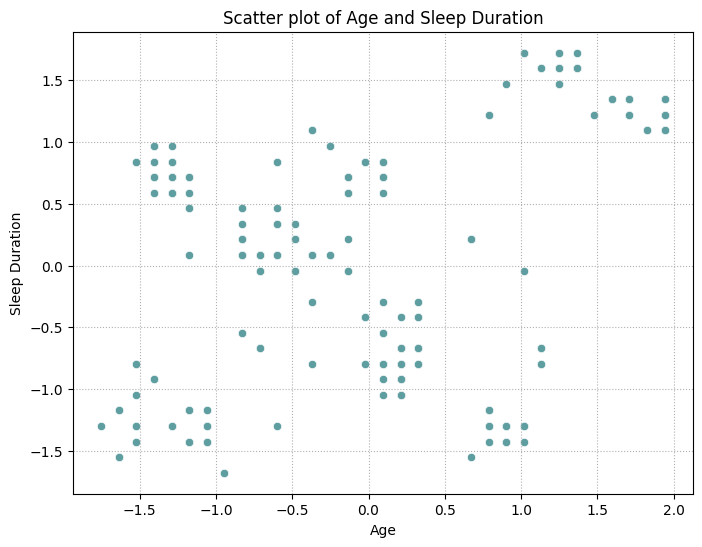

In [16]:
# Columns extractions
age = data_scaled[:, 0]
duration = data_scaled[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=age, y=duration, marker='o', c='cadetblue')
plt.title('Scatter plot of Age and Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.grid(linestyle=':')
plt.show()

<font color="lightcoral">Age</font> and <font color="cadetblue">Sleep Duration</font> scatterplot, now with scalated data. Points are disperse; age and duration don't seem to have a high correlation.

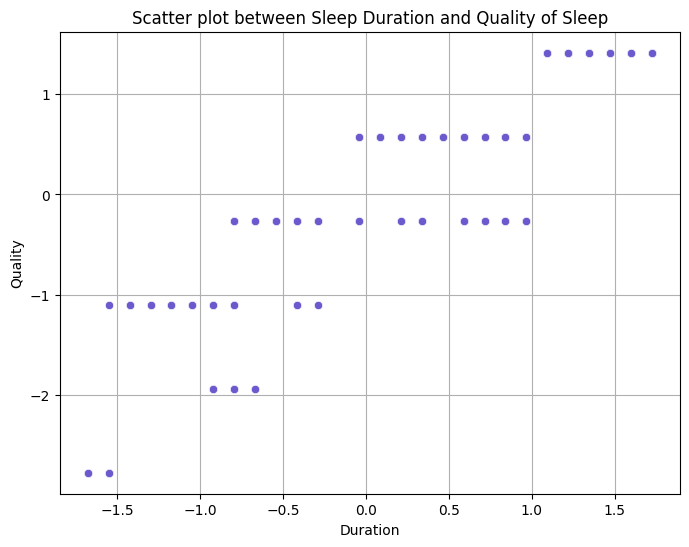

In [17]:
# extracting both variables
duration = data_scaled[:, 1]
quality = data_scaled[:, 2]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=duration, y=quality, marker='o', c='slateblue')
plt.title('Scatter plot between Sleep Duration and Quality of Sleep')
plt.xlabel('Duration')
plt.ylabel('Quality')
plt.grid(True)
plt.show()

<font color="indianred">Quality</font> and <font color="cadetblue">Sleep Duration</font> scatter plot. Points show an ascendent direction; there's a correlation that seems to be positive.

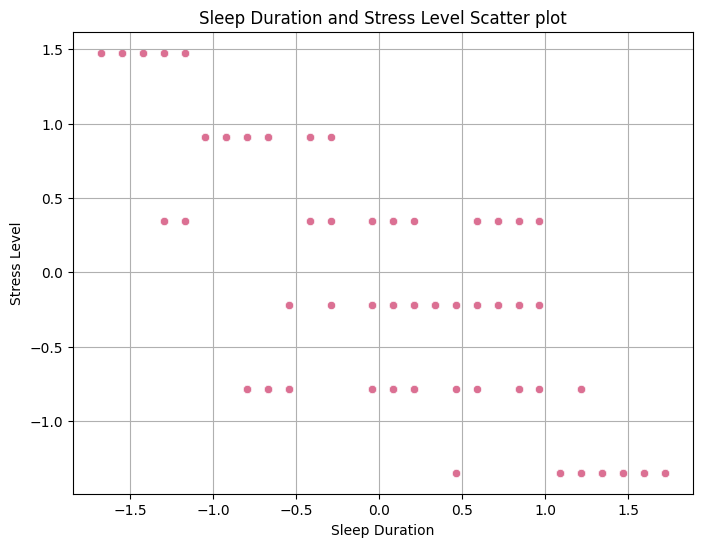

In [18]:
# extracting both columns
duration = data_scaled[:, 1]
stress = data_scaled[:, 4]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=duration, y=stress, marker='o', c='palevioletred')
plt.title('Sleep Duration and Stress Level Scatter plot')
plt.xlabel('Sleep Duration')
plt.ylabel('Stress Level')
plt.grid(True)
plt.show()

<font color="cadetblue">Sleep Duration</font> and <font color="seagreen">Stress Level</font> scatter plot. In this case, points' direction are descendent; the correlation is negative.

#### Cumulative variance

Cumulative variance of principal components
 [0.49767263 0.75814254 0.87170726 0.95680261 0.9792767  0.99193692
 1.        ]


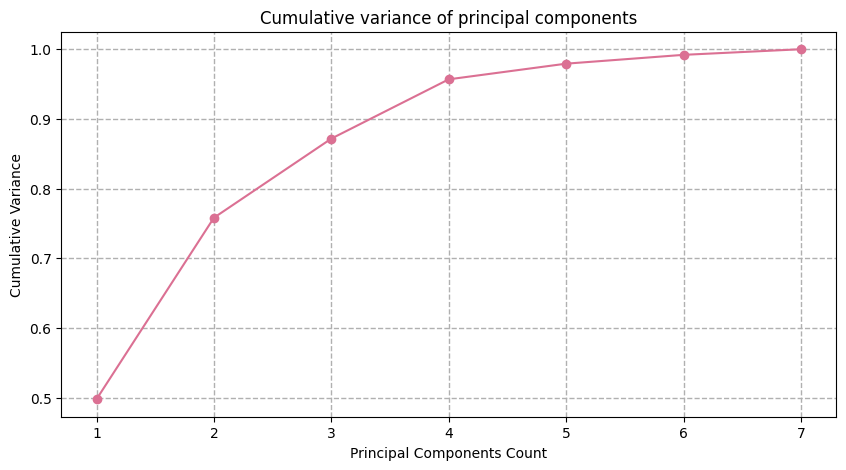

In [19]:
# Cumulative variance of principal components

cumulative_variance = np.cumsum(obj.explained_variance_ratio_)
print('Cumulative variance of principal components\n', cumulative_variance)

plt.figure(figsize=(10,5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', c='palevioletred')
plt.xlabel('Principal Components Count')
plt.ylabel('Cumulative Variance')
plt.title('Cumulative variance of principal components')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(linestyle='--', linewidth=1)
plt.show()

This cumulative variance of principal components shows a scree plot where the x-axis represents the number of components and the y-axis represents the cumulative explained variance.
It seems that the first component accumulates 49%, second component accumulates 76% and third accumulates 87%. The first three will be used to create a final matrix of principal components that retains a considerable part of the original variance.

Principal Components Matrix:
    Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0 -0.29           -0.48             -0.52                    -0.09   
1  0.12            0.02              0.02                     0.70   
2  0.86           -0.09             -0.04                     0.00   
3 -0.37            0.45              0.12                     0.28   
4 -0.10           -0.64             -0.03                     0.36   
5 -0.08           -0.26              0.52                    -0.49   
6  0.05            0.29             -0.67                    -0.25   

   Stress Level  Heart Rate  Daily Steps  
0          0.50        0.39         0.00  
1          0.13        0.13         0.68  
2          0.03        0.43        -0.24  
3         -0.13        0.66        -0.34  
4         -0.64       -0.01        -0.21  
5         -0.19        0.43         0.45  
6         -0.53        0.13         0.33  


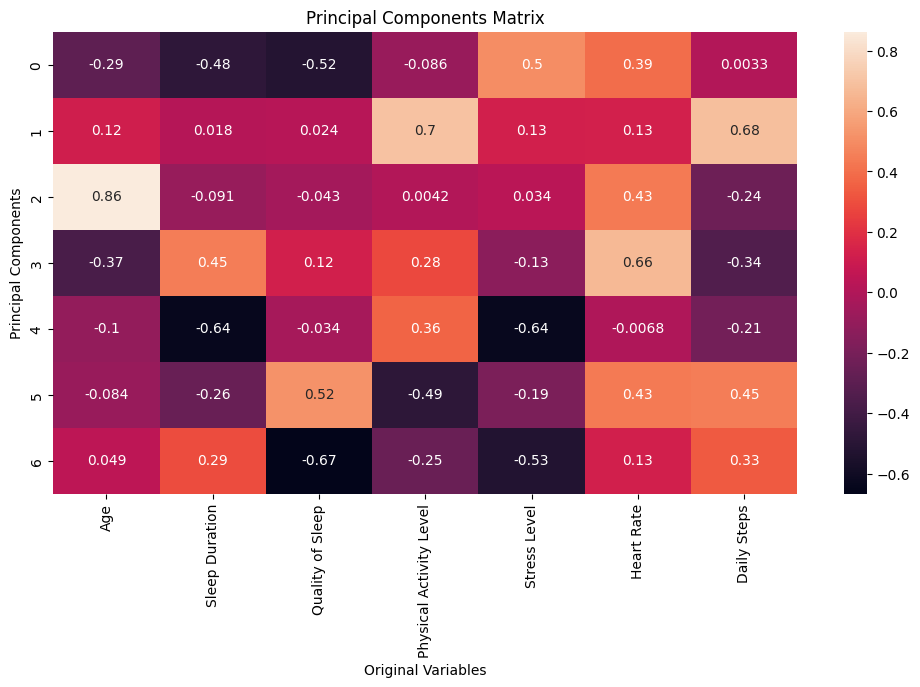

In [11]:
components_matrix = pd.DataFrame(data=obj.components_, columns=['Age', 'Sleep Duration',
                                                                'Quality of Sleep',
                                                                'Physical Activity Level',
                                                                'Stress Level', 'Heart Rate',
                                                                'Daily Steps'])
print("Principal Components Matrix:")
print(components_matrix.round(decimals=2))

plt.figure(figsize=(12, 6))
sns.heatmap(components_matrix, annot=True, cmap='rocket')
plt.xlabel('Original Variables')
plt.ylabel('Principal Components')
plt.title('Principal Components Matrix')
plt.show()

Principal components matrix (first three components):
     Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0 -0.29           -0.48             -0.52                    -0.09   
1  0.12            0.02              0.02                     0.70   
2  0.86           -0.09             -0.04                     0.00   

   Stress Level  Heart Rate  Daily Steps  
0          0.50        0.39         0.00  
1          0.13        0.13         0.68  
2          0.03        0.43        -0.24  


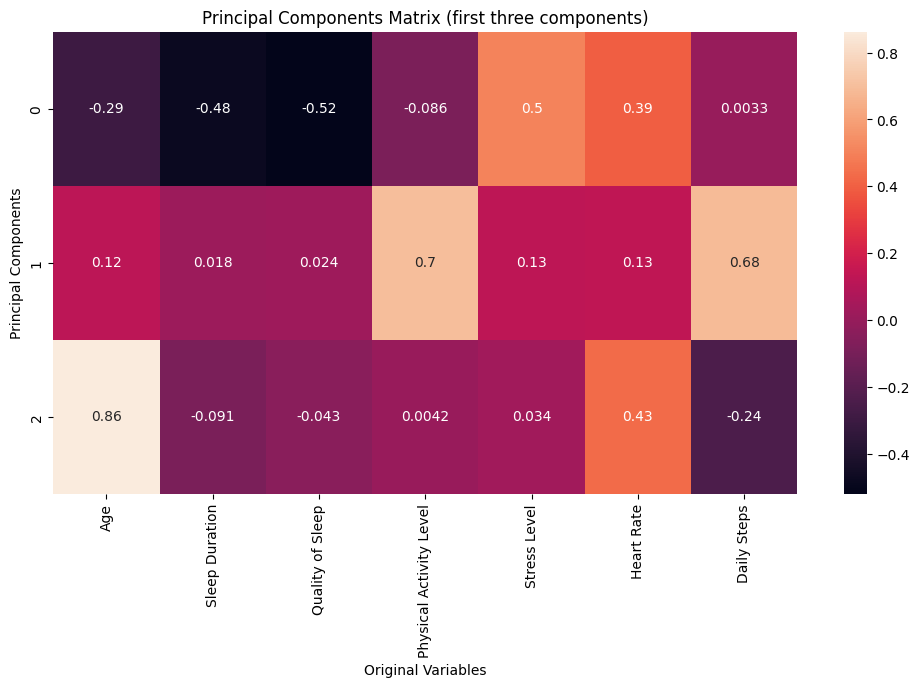

In [12]:
# Principal components matrix for the first three components
components_matrix_2 = pd.DataFrame(data=obj.components_[:3, :], columns=['Age', 'Sleep Duration',
                                                                          'Quality of Sleep',
                                                                          'Physical Activity Level',
                                                                          'Stress Level',
                                                                          'Heart Rate',
                                                                          'Daily Steps'])
print("Principal components matrix (first three components):\n", components_matrix_2.round(decimals=2))

plt.figure(figsize=(12, 6))
sns.heatmap(components_matrix_2, annot=True, cmap='rocket')
plt.xlabel('Original Variables')
plt.ylabel('Principal Components')
plt.title('Principal Components Matrix (first three components)')
plt.show()

I create a DataFrame to display the loadings (or weights) of each original variable on the principal components, which helps in interpreting the components.
Then, I use a matrix visualization using a heatmap, which helps in understanding which variables contribute most to each principal component.

In [13]:
# Dataset transformation using the first two principal components
num_components = 3
data_transformed = pca.transform(data_scaled)[:, :num_components]

# New dataset using transformed data
columns = [f'PC{i+1}' for i in range(num_components)]
df_transformed = pd.DataFrame(data=data_transformed, columns=columns)
result = pd.concat([df_transformed, data[['Gender', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']]], axis=1)

print("Transformed Dataset using the first three principal components:")
result.head()

Transformed Dataset using the first three principal components:


,PC1,PC2,PC3,Gender,BMI Category,Blood Pressure,Sleep Disorder
0,2.599071,-1.686001,-0.232173,Male,Overweight,126/83,None
1,2.817452,1.468414,-1.175076,Male,Normal,125/80,None
2,2.817452,1.468414,-1.175076,Male,Normal,125/80,None
3,4.933235,-2.233814,1.015186,Male,Obese,140/90,Sleep Apnea
4,4.933235,-2.233814,1.015186,Male,Obese,140/90,Sleep Apnea


Adding categorical variables to the dataset...

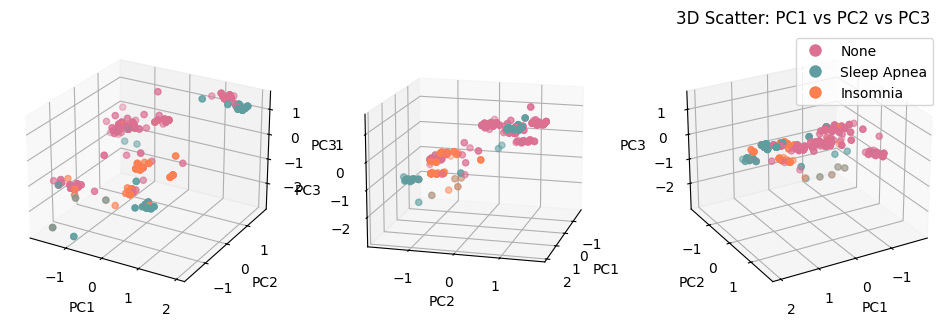

In [26]:
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

# Mapping color function based on variable Sleep Disorder
color_map = {'None': 'palevioletred', 'Sleep Apnea': 'cadetblue', 'Insomnia': 'coral'}
colors = data['Sleep Disorder'].map(color_map)

# Tridimensional plot with colors assigned per disorder
for ax in axes:
    ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c=colors)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.title('3D Scatter: PC1 vs PC2 vs PC3')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

# Customized legend
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=disorder)
                    for disorder, color in color_map.items()]
plt.legend(handles=legend_labels)
plt.show()

3D scatter plot with the three principal components, using the <font color="rosybrown">Sleep Disorder</font> variable to create color clusters.

### Clusters

Implementation of a clustering analysis using K-means algorithm.

In [14]:
numeric_data = pd.get_dummies(data)
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(numeric_data)
labels = kmeans.labels_
data['Cluster'] = labels

I use the `pd.get_dummies()` function to convert categorical variables into dummy/indicator variables.
Then, I initialize the K-Means class with 3 clusters and 10 runtimes with different centroid seeds. The final results will be the best output in terms of inertia.
Finally, I fit the K-Means model on the numeric data obtained from the previous step, extract the cluster labels using `kmeans.labels_` and add them as a new column. This step categorizes each data point into one of the three clusters.

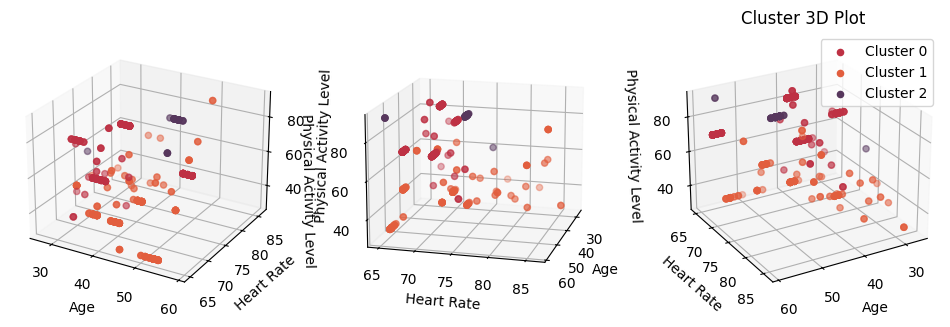

In [28]:
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

colors = {0: '#BE3144', 1: '#E25E3E', 2: '#57375D'}

for ax in axes:
    for cluster, color in colors.items():
        cluster_data = data[data['Cluster'] == cluster]
        ax.scatter(cluster_data['Age'], cluster_data['Heart Rate'], cluster_data['Physical Activity Level'], c=color, label=f'Cluster {cluster}')
        ax.set_xlabel('Age')
        ax.set_ylabel('Heart Rate')
        ax.set_zlabel('Physical Activity Level')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

plt.title('Cluster 3D Plot')
plt.legend()
plt.show()

3D scatter plot to visualize the clusters. This analysis helps to identify patterns or groups based on similarities in the features <font color="lightcoral">age</font>, <font color="chocolate">heart rate</font> and <font color="palevioletred">physical activiy level</font>.

### Linear Progression Models

For a sleep duration of 5.8 hours, the prediction for quality of sleep is 5.94
For a sleep duration of 5.9 hours, the prediction for quality of sleep is 6.07
For a sleep duration of 6.0 hours, the prediction for quality of sleep is 6.07
For a sleep duration of 6.1 hours, the prediction for quality of sleep is 5.68
For a sleep duration of 6.2 hours, the prediction for quality of sleep is 5.68
For a sleep duration of 6.3 hours, the prediction for quality of sleep is 5.68
For a sleep duration of 6.4 hours, the prediction for quality of sleep is 6.21
For a sleep duration of 6.5 hours, the prediction for quality of sleep is 8.20
For a sleep duration of 6.6 hours, the prediction for quality of sleep is 8.20
For a sleep duration of 6.7 hours, the prediction for quality of sleep is 8.20
For a sleep duration of 6.8 hours, the prediction for quality of sleep is 5.94
For a sleep duration of 6.9 hours, the prediction for quality of sleep is 8.20
For a sleep duration of 7.1 hours, the prediction fo

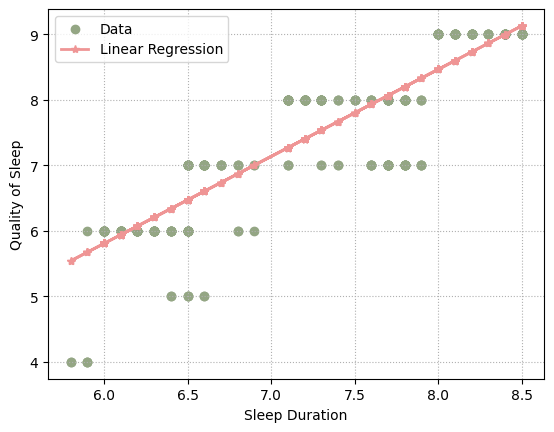

In [15]:
modelo = LinearRegression()

X = data['Sleep Duration'].values.reshape(-1, 1)
y = data['Quality of Sleep'].values.reshape(-1, 1)
modelo.fit(X, y)

y_pred = modelo.predict(X)
unique_values = np.unique(X) # avoids repetition of sleep duration values

for i in range(len(unique_values)):
    print(f"For a sleep duration of {unique_values[i]} hours, the prediction for quality of sleep is {y_pred[i][0]:.2f}")

plt.scatter(X, y, c='#94A684', label='Data')
plt.plot(X, y_pred, color='#EF9595', marker='*', linewidth=2, label='Linear Regression')
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.grid(linestyle=':')
plt.legend()
plt.show()

For 3000 daily steps, the prediction for physical activity level is 33.14
For 3300 daily steps, the prediction for physical activity level is 90.84
For 3500 daily steps, the prediction for physical activity level is 90.84
For 3700 daily steps, the prediction for physical activity level is 21.20
For 4000 daily steps, the prediction for physical activity level is 21.20
For 4100 daily steps, the prediction for physical activity level is 21.20
For 4200 daily steps, the prediction for physical activity level is 26.17
For 4800 daily steps, the prediction for physical activity level is 70.94
For 5000 daily steps, the prediction for physical activity level is 70.94
For 5200 daily steps, the prediction for physical activity level is 70.94
For 5500 daily steps, the prediction for physical activity level is 70.94
For 5600 daily steps, the prediction for physical activity level is 70.94
For 6000 daily steps, the prediction for physical activity level is 70.94
For 6200 daily steps, the prediction f

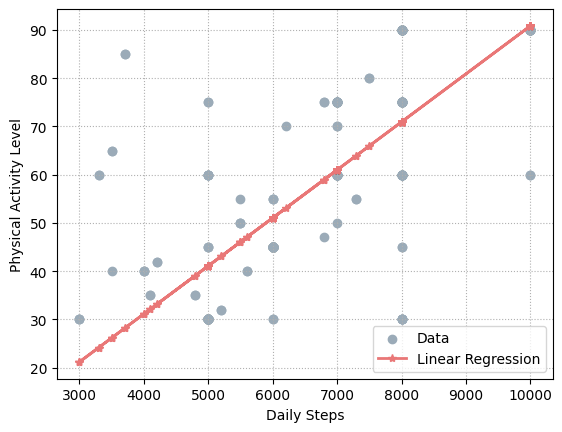

In [16]:
modelo = LinearRegression()

X = data['Daily Steps'].values.reshape(-1, 1)
y = data['Physical Activity Level'].values.reshape(-1, 1)
modelo.fit(X, y)

y_pred = modelo.predict(X)
unique_values = np.unique(X) # avoids repetition of daily steps values

for i in range(len(unique_values)):
    print(f"For {unique_values[i]} daily steps, the prediction for physical activity level is {y_pred[i][0]:.2f}")

plt.scatter(X, y, c='#9BABB8', label='Data')
plt.plot(X, y_pred, color='#E97777', marker='*', linewidth=2, label='Linear Regression')
plt.xlabel('Daily Steps')
plt.ylabel('Physical Activity Level')
plt.grid(linestyle=':')
plt.legend()
plt.show()

For an age of 27 years, the prediction for stress level is 6.70
For an age of 28 years, the prediction for stress level is 6.61
For an age of 29 years, the prediction for stress level is 6.61
For an age of 30 years, the prediction for stress level is 6.61
For an age of 31 years, the prediction for stress level is 6.61
For an age of 32 years, the prediction for stress level is 6.61
For an age of 33 years, the prediction for stress level is 6.52
For an age of 34 years, the prediction for stress level is 6.52
For an age of 35 years, the prediction for stress level is 6.52
For an age of 36 years, the prediction for stress level is 6.52
For an age of 37 years, the prediction for stress level is 6.52
For an age of 38 years, the prediction for stress level is 6.52
For an age of 39 years, the prediction for stress level is 6.52
For an age of 40 years, the prediction for stress level is 6.52
For an age of 41 years, the prediction for stress level is 6.52
For an age of 42 years, the prediction f

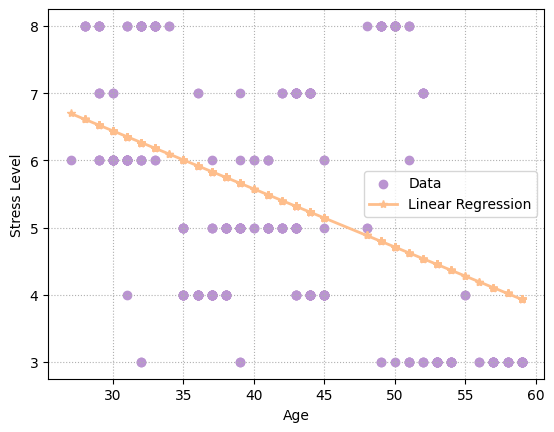

In [18]:
modelo = LinearRegression()

X = data['Age'].values.reshape(-1, 1)
y = data['Stress Level'].values.reshape(-1, 1)
modelo.fit(X, y)

y_pred = modelo.predict(X)
unique_values = np.unique(X) # avoids repetition of age values

for i in range(len(unique_values)):
    print(f"For an age of {unique_values[i]} years, the prediction for stress level is {y_pred[i][0]:.2f}")

plt.scatter(X, y, c='#BA94D1', label='Data')
plt.plot(X, y_pred, color='#FEBE8C', marker='*', linewidth=2, label='Linear Regression')
plt.xlabel('Age')
plt.ylabel('Stress Level')
plt.grid(linestyle=':')
plt.legend()
plt.show()


Each of these models is visualized to assess the fit and to understand the linear relationships between the variables. The scatter plots show the actual data points, and the line plots show the predicted values based on the linear regression models, helping to visually assess how well the model captures the trends in the data.